In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Numpy
## Useful Methods

In [3]:
# Three equally spaced points between 0 and 5
np.linspace(0, 5, 3)

# Identity Matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Random-Stuff

In [4]:
# Uniformly distributed
np.random.rand(5)

array([0.15219588, 0.43565551, 0.99654236, 0.3060851 , 0.21511276])

In [5]:
# Standard Normal Distribution
np.random.randn(5)

array([-0.9324851 ,  1.18332577,  0.90882222,  1.02566378, -0.02589843])

In [6]:
# Random Integers
np.random.randint(1,7, 10)

array([4, 6, 2, 3, 1, 4, 4, 4, 5, 3])

## Reshaping

In [7]:
a = np.random.randint(0,50,10)
a

array([31, 16,  3, 38, 38, 12, 48, 15, 44, 39])

In [8]:
ra = a.reshape(5,2)
ra

array([[31, 16],
       [ 3, 38],
       [38, 12],
       [48, 15],
       [44, 39]])

In [9]:
ra.argmin()

2

## Indexing and Selection  

- Broadcasting

**NOTE** Slices return views of array, not copies! For copying use `arr.copy()`

----

In [10]:
arr = np.arange(0,11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
slice_of_arr = arr[:5]
print(slice_of_arr)
slice_of_arr[:] = 99 # BROADCASTING
print(slice_of_arr)
print(arr)

[0 1 2 3 4]
[99 99 99 99 99]
[99 99 99 99 99  5  6  7  8  9 10]


# Pandas
## Hierarchical Indexing

In [12]:
arr = np.random.randn(6,2)
print(arr)
df = pd.DataFrame(arr)
print(df)

[[ 0.85951237 -1.74162368]
 [-0.03183818 -1.15512991]
 [ 0.06029629 -0.61190692]
 [ 0.22225663 -0.54344907]
 [-1.25706182  0.04683887]
 [ 0.25952662  1.52420805]]
          0         1
0  0.859512 -1.741624
1 -0.031838 -1.155130
2  0.060296 -0.611907
3  0.222257 -0.543449
4 -1.257062  0.046839
5  0.259527  1.524208


In [13]:
groups = ["G1"]*3 + ["G2"]*3
nums = [1, 2, 3, 1, 2, 3]

df.index=pd.MultiIndex.from_tuples(zip(groups, nums))
df.index.names = ["groups", "nums"]

In [14]:
df

0         1
groups nums                    
G1     1     0.859512 -1.741624
       2    -0.031838 -1.155130
       3     0.060296 -0.611907
G2     1     0.222257 -0.543449
       2    -1.257062  0.046839
       3     0.259527  1.524208

In [15]:
df.loc["G2"].loc[2]

0   -1.257062
1    0.046839
Name: 2, dtype: float64

In [16]:
df.xs(2, level=1)

,0,1
groups,,
G1,-0.031838,-1.155130
G2,-1.257062,0.046839


In [17]:
df = pd.DataFrame({
    "group": "g1 g1 g2 g2 g1".split(),
    "a": "a b c d e".split(), 
    "b": "f g h i j".split(),
    })
df

,group,a,b
0,g1,a,f
1,g1,b,g
2,g2,c,h
3,g2,d,i
4,g1,e,j


In [18]:
df.apply(lambda row: list(row), axis=1)

0    [g1, a, f]
1    [g1, b, g]
2    [g2, c, h]
3    [g2, d, i]
4    [g1, e, j]
dtype: object

In [19]:
df.groupby("group").agg(lambda x: list(x))

,a,b
group,,
g1,"[a, b, e]","[f, g, j]"
g2,"[c, d]","[h, i]"


## Merging and Joining
- `df1.join(df2)` joins **only on index** but is faster than `pd.merge(df1, df2, on=COLNAME)`

# Matplotlib
## Functional Interface

Text(0.5, 1.0, 'FUNCTIONAL Plot')

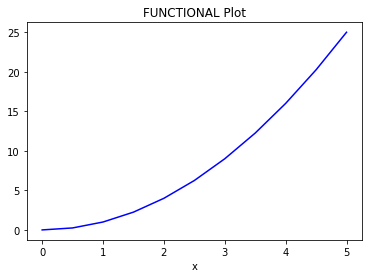

In [20]:
x = np.linspace(0,5,11)
y = x**2
# FUNCTIONAL
plt.plot(x,y, "b")
plt.xlabel("x")
plt.title("FUNCTIONAL Plot")

## Object Oriented Interface (Better)

Text(0.5, 1.0, 'OOP PLOT')

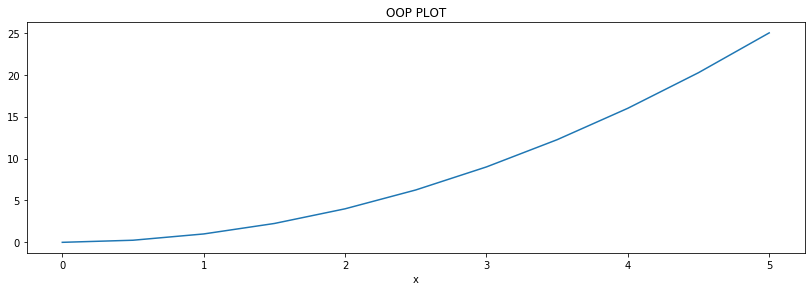

In [21]:
x = np.linspace(0,5,11)
y = x**2

# OOP
fig = plt.figure()

# left, bottom, width, heidht of axes
ax = fig.add_axes([0.1, 0.1, 1.8, 0.8])
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_title("OOP PLOT")

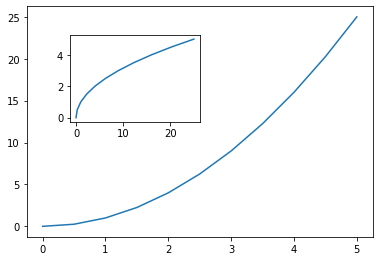

In [22]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x,y)
ax2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])
ax2.plot(y,x)

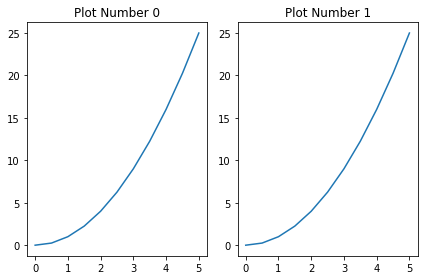

In [23]:
fig, axes = plt.subplots(1,2)

for a in axes:
    n = np.where(axes == a)[0][0]
    a.plot(x,y)
    a.set_title("Plot Number " + str(n))

plt.tight_layout() # To prevent overlap

## Other Parameters

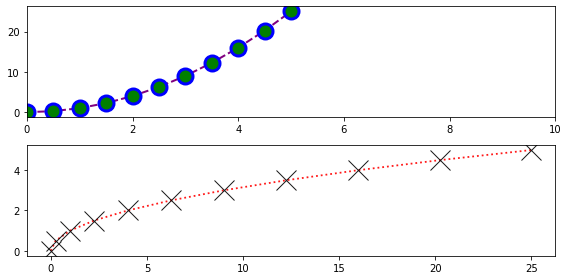

In [24]:
plt.style.use("fast")
fig, axes = plt.subplots(2, 1, figsize=(8,4))

axes[0].plot(x,y, color="purple", linewidth=2, linestyle="--", marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", markeredgewidth=3)
axes[1].plot(y,x, color="red", alpha=0.9, lw=1.8, ls=":", marker="x", ms=20, mec="black") # lw <=> linewidth and ls <=> linestyle and mfc=markerfacecolor etc.
axes[0].set_xlim(0,10)
plt.tight_layout()

In [25]:
help(axes[0].plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

----

#### See the "Advanced matplotlib Concepts" Notebook for more details!

# Seaborn

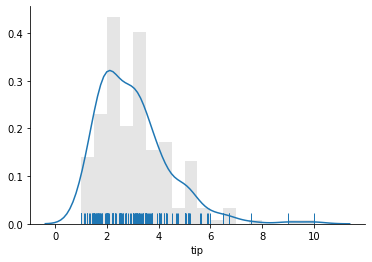

In [26]:
# RUGPLOTS!
df = sns.load_dataset("tips")
sns.rugplot(df.tip)
sns.distplot(df.tip, hist_kws=dict(alpha=0.2, color="0.5"))
sns.despine()

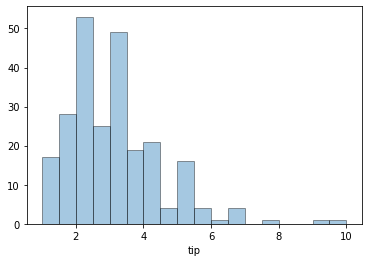

In [27]:
sns.distplot(df.tip, kde=False, hist_kws=dict(ec="k")) # Shows VALUE COUNTs on y instead of KDE

In [28]:
# Useful dict trick for (un)packing:
dict(linecolor="w", lw=0.2)

{'linecolor': 'w', 'lw': 0.2}

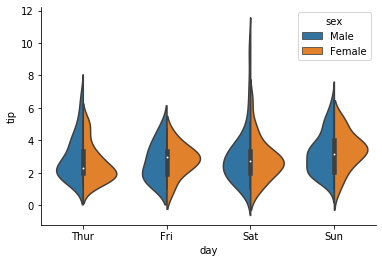

In [29]:
sns.violinplot(data=df, x="day", y="tip", hue="sex", split=True) #Split shows both hues instead of mirroring
sns.despine()

In [30]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


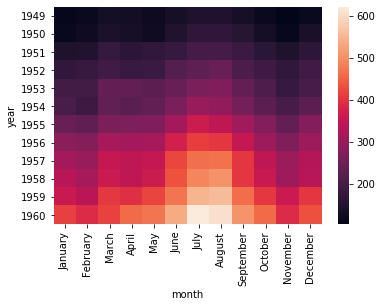

In [31]:
fp = pd.pivot_table(data=df, index="year", columns="month", values="passengers")
sns.heatmap(fp) # linecolor="w", lw=0.2

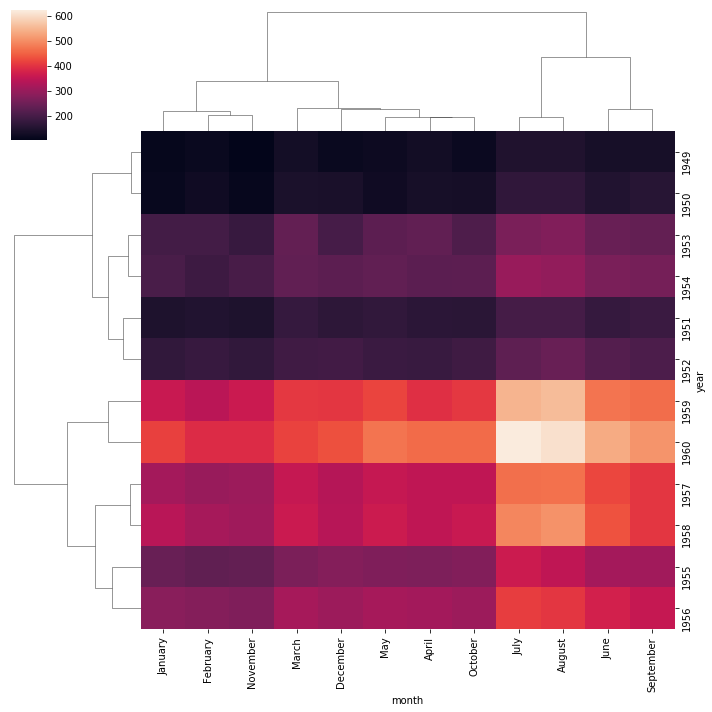

In [32]:
sns.clustermap(fp)

----

#### Clustermap shows similar months and years close to each other (Note the different order!) 

In [33]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# Pandas Plotting

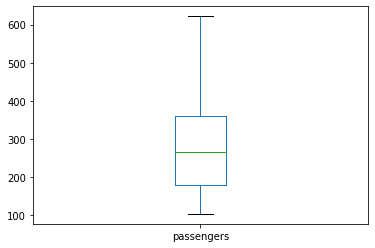

In [37]:
df.passengers.plot.box()

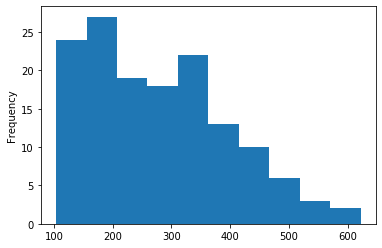

In [38]:
df.passengers.plot.hist()